# Introduction
In this notebook, we will apply undersampling technique and use the classification strategies we used in the notebook *Classification on imbalanced dataset.ipynb*

### Imports

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Sometimes sklearn gives ConvergenceWarnings. So we ignore those.
from warnings import filterwarnings
filterwarnings('ignore')

### Preparing and undersampling features

In [5]:
# Reading the dataset.
df = pd.read_csv('LSD_data.csv', sep=',')

# Getting features and labels.
X = df[['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'dominant_land_cover']].values
y = df['lumpy'].values

### Splitting into train and test sets

In [6]:
# Splitting into train-test in the ratio of 80-20.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f"Before undersampling, X_train: {x_train.shape}")
print(f"Before undersampling, y_train: {y_train.shape}")
# Undersampling data
undersampler = RandomUnderSampler(random_state=1)
x_train, y_train = undersampler.fit_resample(x_train, y_train)
print(f"After undersampling, x_train: {x_train.shape}")
print(f"After undersampling, y_train: {y_train.shape}")

# Scaling the features.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(f'x_train shape = {x_train.shape} | y_train shape = {y_train.shape}')
print(f'x_test shape  = {x_test.shape}  | y_test shape = {y_test.shape}')

Before undersampling, X_train: (19842, 14)
Before undersampling, y_train: (19842,)
After undersampling, x_train: (4760, 14)
After undersampling, y_train: (4760,)
x_train shape = (4760, 14) | y_train shape = (4760,)
x_test shape  = (4961, 14)  | y_test shape = (4961,)


### Core classifiers

##### Logistic Regression

In [7]:
def log_reg_hyptune(x_train, y_train):
    params = {
        'penalty': ['l2'],
        'C': [1.0, 1.5, 2.5, 3.0, 5.0, 10.0],
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=LogisticRegression(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [8]:
log_reg_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'C': 1.5, 'penalty': 'l2'}
Best score = 0.8831932773109245
Mean train score = 0.8828256302521007
Mean val  score = 0.8829831932773109
Total training time = 0:00:00.990300


In [9]:
def train_evaluate_log_reg(x_train, y_train, x_test, y_test):
    log_reg = LogisticRegression(C=1.5, penalty='l2')
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3829
           1       0.89      0.52      0.65      1132

    accuracy                           0.87      4961
   macro avg       0.88      0.75      0.79      4961
weighted avg       0.88      0.87      0.86      4961




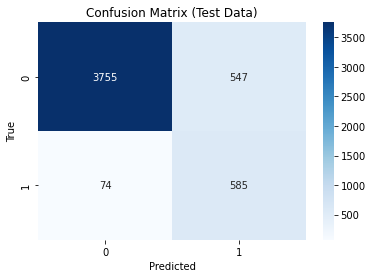

In [10]:
train_evaluate_log_reg(x_train, y_train, x_test, y_test)

##### SVM

In [11]:
def svm_hyptune(x_train, y_train):
    params = {
        'penalty': ['l2'],
        'C': [1.0, 1.5, 2.5, 3.0, 5.0]
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=LinearSVC(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [12]:
svm_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'C': 3.0, 'penalty': 'l2'}
Best score = 0.8783613445378151
Mean train score = 0.8790756302521008
Mean val  score = 0.8774789915966388
Total training time = 0:00:02.553754


In [13]:
def train_evaluate_svm(x_train, y_train, x_test, y_test):
    svm = LinearSVC(C=3.0, penalty='l2')
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3795
           1       0.89      0.50      0.64      1166

    accuracy                           0.87      4961
   macro avg       0.88      0.74      0.78      4961
weighted avg       0.87      0.87      0.85      4961




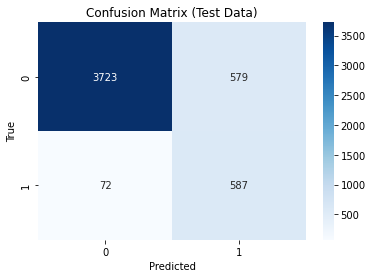

In [14]:
train_evaluate_svm(x_train, y_train, x_test, y_test)

##### Decision Tree

In [15]:
def dt_hyptune(x_train, y_train):
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [100, 150, 200],

    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=DecisionTreeClassifier(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [16]:
dt_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'criterion': 'entropy', 'max_depth': 150}
Best score = 0.9439075630252102
Mean train score = 1.0
Mean val  score = 0.9401260504201682
Total training time = 0:00:00.688324


In [17]:
def train_evaluate_dt(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=150)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4046
           1       0.95      0.69      0.80       915

    accuracy                           0.94      4961
   macro avg       0.94      0.84      0.88      4961
weighted avg       0.94      0.94      0.93      4961




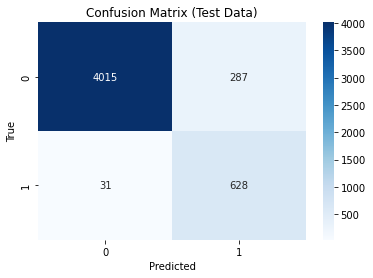

In [18]:
train_evaluate_dt(x_train, y_train, x_test, y_test)

##### Random Forest

In [21]:
def rf_hyptune(x_train, y_train):
    params = {
        'n_estimators': [10, 20, 30],
        'criterion': ['gini', 'entropy'],
        'max_depth': [50, 100],
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=RandomForestClassifier(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.mean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.mean(clf.cv_results_['mean_test_score'], axis=0)

    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [22]:
rf_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 30}
Best score = 0.957563025210084
Mean train score = 0.9980392156862745
Mean val  score = 0.9544467787114845
Total training time = 0:00:05.505907


In [23]:
def train_evaluate_rf(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(criterion='gini', max_depth=100, n_estimators=30)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4102
           1       0.96      0.73      0.83       859

    accuracy                           0.95      4961
   macro avg       0.95      0.86      0.90      4961
weighted avg       0.95      0.95      0.95      4961




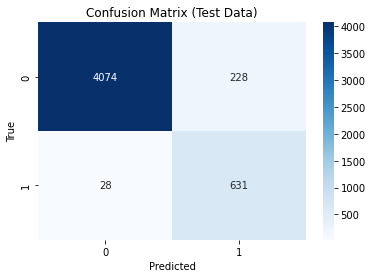

In [24]:
train_evaluate_rf(x_train, y_train, x_test, y_test)

#### SGD

In [25]:
def sgd_hyptune(x_train, y_train):
    params = {
        'penalty': ['l1', 'l2'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'optimal', 'invscaling'],
        'max_iter': [1000, 2000, 3000]
    }

    start_time = time.time()
    print('Training started..')

    clf = GridSearchCV(
            estimator=SGDClassifier(), 
            param_grid=params, 
            cv=5, 
            return_train_score=True
          )
    clf.fit(x_train, y_train)

    print('Training ended..')
    end_time = time.time()

    total_training_time = str(datetime.timedelta(seconds=end_time-start_time))
    mean_train_score = np.nanmean(clf.cv_results_['mean_train_score'], axis=0)
    mean_val_score = np.nanmean(clf.cv_results_['mean_test_score'], axis=0)
    
    print('\nResults:\n')
    print(f'Best params = {clf.best_params_}')
    print(f'Best score = {clf.best_score_}')
    print(f'Mean train score = {mean_train_score}')
    print(f'Mean val  score = {mean_val_score}')
    print(f'Total training time = {total_training_time}')

In [26]:
sgd_hyptune(x_train, y_train)

Training started..
Training ended..

Results:

Best params = {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 3000, 'penalty': 'l1'}
Best score = 0.8911764705882353
Mean train score = 0.8845646591970122
Mean val  score = 0.8834500466853409
Total training time = 0:00:01.115307


In [27]:
def train_evaluate_sgd(x_train, y_train, x_test, y_test):
    sgd = SGDClassifier(alpha=0.001, learning_rate='optimal', penalty='l1', max_iter=3000)
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_test)

    # Results.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    classif_rep = classification_report(y_pred, y_test)
    print('Classification report:\n')
    print(classif_rep)
    print()
    
    sn.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix (Test Data)') 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3845
           1       0.90      0.53      0.67      1116

    accuracy                           0.88      4961
   macro avg       0.89      0.76      0.80      4961
weighted avg       0.88      0.88      0.87      4961




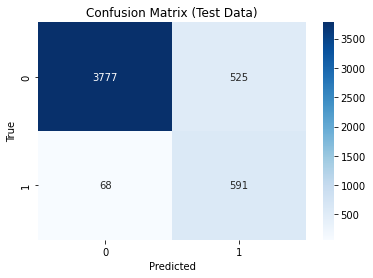

In [28]:
train_evaluate_sgd(x_train, y_train, x_test, y_test)

### Undersampled results summary of core classifiers
Here, recall & f1 are of label 1 only. Accuracy represents the overall models performance.

| Classifier                  	| Recall 	| F1   	| Accuracy 	|
|-----------------------------	|--------	|------	|----------	|
| Logistic Regression         	| 0.52  	| 0.65 	| 0.87     	|
| SVM                         	| 0.50   	| 0.64 	| 0.87     	|
| Decision Trees              	| 0.69   	| 0.80 	| 0.94     	|
| Random Forest               	| 0.73   	| 0.83 	| 0.95     	|
| Stochastic Gradient Descent 	| 0.53   	| 0.67 	| 0.88     	|

### Core ensemble methods

In [29]:
def generate_results(y_test, y_pred):
    """
    Generate Confusion Matrix and Classification Report for
    a given pair of y_pred and y_test values
    """
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)
    
    report = classification_report(y_pred, y_test)
    print(f"Classification Report: \n{report}\n")
    
    sn.heatmap(cm_df, annot=True, cmap="Blues", fmt="g")
    plt.title("Confustion Matrix (Test Data)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

##### Voting classifier

In [30]:
def train_evaluate_voting(x_train, y_train, x_test, y_test):
    sgd_clf = SGDClassifier(alpha=0.001, learning_rate='optimal', penalty='l1', max_iter=3000)
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=150)
    rf_clf = RandomForestClassifier(criterion='gini', max_depth=100, n_estimators=30)
    
    ensemble = [
        ('sgd_clf', sgd_clf),
        ('dt', dt_clf),
        ("rf", rf_clf),
    ]

    voting_clf = VotingClassifier(estimators=ensemble)
    voting_clf.fit(x_train, y_train)
    y_pred = voting_clf.predict(x_test)
    
    # Results
    generate_results(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4093
           1       0.96      0.73      0.83       868

    accuracy                           0.95      4961
   macro avg       0.95      0.86      0.90      4961
weighted avg       0.95      0.95      0.94      4961




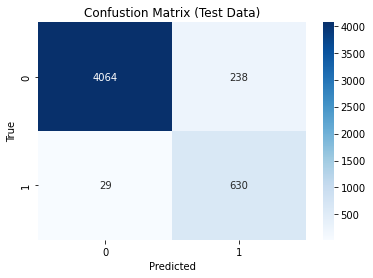

In [31]:
train_evaluate_voting(x_train, y_train, x_test, y_test)

##### Adaboost classifier

In [32]:
def train_evaluate_adaboost(x_train, y_train, x_test, y_test):
    rf_clf = RandomForestClassifier(criterion='gini', max_depth=100, n_estimators=30)
    adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf)
    
    adaboost_clf.fit(x_train, y_train)
    y_pred = adaboost_clf.predict(x_test)
        
    generate_results(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4113
           1       0.96      0.75      0.84       848

    accuracy                           0.95      4961
   macro avg       0.96      0.87      0.91      4961
weighted avg       0.95      0.95      0.95      4961




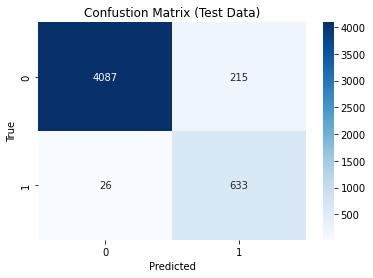

In [33]:
train_evaluate_adaboost(x_train, y_train, x_test, y_test)

##### Bagging classifier

In [34]:
def train_evaluate_bagging(x_train, y_train, x_test, y_test):
    rf_clf = RandomForestClassifier(criterion='gini', max_depth=100, n_estimators=30)
    bagging_clf = BaggingClassifier(base_estimator=rf_clf)
    
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    
    generate_results(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4063
           1       0.97      0.71      0.82       898

    accuracy                           0.94      4961
   macro avg       0.95      0.85      0.89      4961
weighted avg       0.94      0.94      0.94      4961




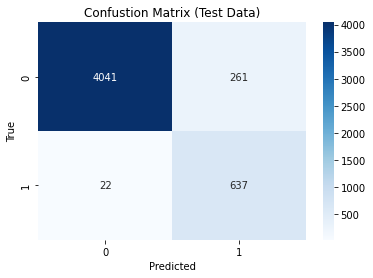

In [35]:
train_evaluate_bagging(x_train, y_train, x_test, y_test)

### Undersampled results summary of core ensemble methods
Here, recall & f1 are of label 1 only. Accuracy represents the overall models performance.

| Classifier          	| Recall 	| F1   	| Accuracy 	|
|---------------------	|--------	|------	|----------	|
| Voting Classifier   	| 0.73   	| 0.83 	| 0.95     	|
| Adaboost Classifier 	| 0.75   	| 0.84 	| 0.95     	|
| Bagging Classifier  	| 0.71   	| 0.81 	| 0.94     	|